<a href="https://colab.research.google.com/github/MaryAdewunmi/ExamResult-Prediction/blob/main/Predicting_Exam_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This Project predicts the results of Candidates based on 2 distinct features,daily self study and monthly tutoring with a specific Teacher.** 

***Import necessary Libraries***

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**[Import datasets**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Exam_Test.xlsx to Exam_Test.xlsx


In [ ]:
data = pd.read_excel('Exam_Test.xlsx')

**Data Cleaning and exploration**

In [ ]:
data.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Self_Study_Daily  683 non-null    int64
 1   Tution_Monthly    683 non-null    int64
 2   Pass_Or_Fail      683 non-null    int64
dtypes: int64(3)
memory usage: 16.1 KB


In [28]:
data.info

<bound method DataFrame.info of      Self_Study_Daily  Tution_Monthly  Pass_Or_Fail
0                   7              27             1
1                   2              43             0
2                   7              26             1
3                   8              29             1
4                   3              42             0
..                ...             ...           ...
678                 7              27             1
679                 6              24             1
680                 2              41             0
681                 5              34             0
682                 4              38             0

[683 rows x 3 columns]>

In [29]:
data.shape

(683, 3)

In [31]:
data.isnull()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
678,False,False,False
679,False,False,False
680,False,False,False
681,False,False,False


**This shows no, the data has no null value**

In [30]:
data.describe

<bound method NDFrame.describe of      Self_Study_Daily  Tution_Monthly  Pass_Or_Fail
0                   7              27             1
1                   2              43             0
2                   7              26             1
3                   8              29             1
4                   3              42             0
..                ...             ...           ...
678                 7              27             1
679                 6              24             1
680                 2              41             0
681                 5              34             0
682                 4              38             0

[683 rows x 3 columns]>

In [32]:
data.tail(20)

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
663,1,41,0
664,5,35,0
665,6,31,0
666,8,29,1
667,1,41,0
668,5,35,0
669,7,26,1
670,6,21,1
671,5,35,0
672,2,43,0


**Overall, the data seems clean and straightforward**

**Data Modelling using Logistic Regression**

In [33]:
#Data Modelling using Logistic Regression

In [ ]:
X = data.drop('Pass_Or_Fail',axis = 1)
y = data.Pass_Or_Fail

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 4)

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = LR.predict(X_test)

**Calculating Accuracy of the Model Built using Confusion matrix,r2,AUC ROC and MAE**

In [ ]:
#Calculating Accuracy of the Model Built

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[79,  5],
       [ 0, 87]])

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
r2_score(y_test, y_pred)

0.8830049261083743

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.029239766081871343

**Mean Absolute Error(MAE) is the difference between predicted values and the actual values**

In [ ]:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)


0.9702380952380952

In [ ]:
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

97.07602339181285

**97.08 means the model is very accurate**

---



In [ ]:
Candidate1 = LR.predict((np.array([2,2]).reshape(1,-1)))
Candidate1

array([1])

**array[1] means PASS, array[0] means FAIL. Obviously, Candidate 1 will pass the Exam**

**Check out the relationship between the two(2) features**

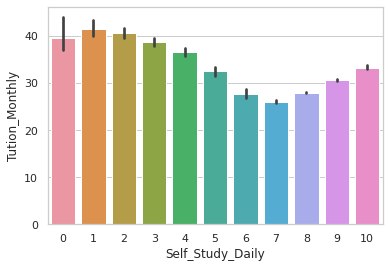

In [44]:

sns.set_theme(style = "whitegrid")
sns.barplot(x = "Self_Study_Daily",y = "Tution_Monthly", data = data)

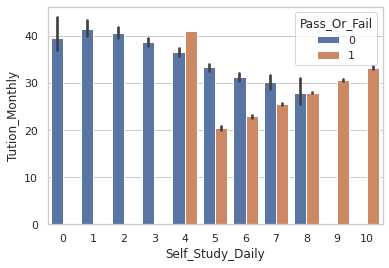

In [38]:
sns.set_theme(style = "whitegrid")
ax = sns.barplot(x="Self_Study_Daily", y="Tution_Monthly", hue="Pass_Or_Fail", data=data)

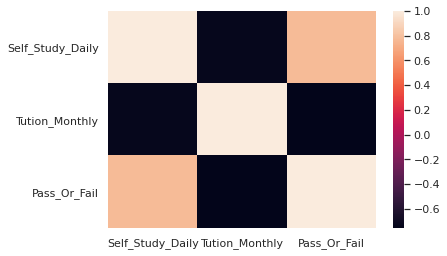

In [37]:
import seaborn as sns
sns.heatmap(data.corr())
sns.set_theme(style = 'whitegrid')

In [19]:
data.columns

Index(['Self_Study_Daily', 'Tution_Monthly', 'Pass_Or_Fail'], dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.7% of the points cannot be placed; yo

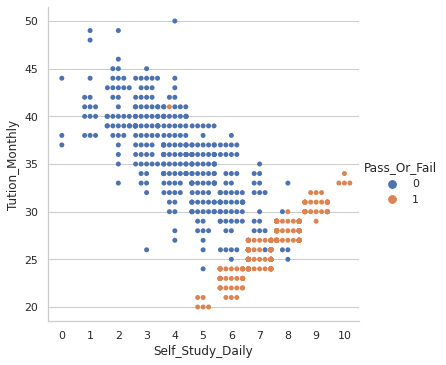

In [45]:
sns.catplot(data=data, x="Self_Study_Daily", y="Tution_Monthly", hue="Pass_Or_Fail",kind = "swarm")
sns.set_theme(style ="whitegrid")

**This figure above shows that Candidates that do daily self-study passed more than the month;y tutorial with special teachers**

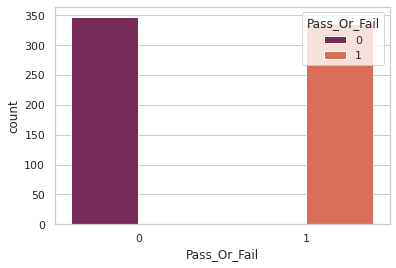

In [49]:
sns.countplot(x= "Pass_Or_Fail",hue = "Pass_Or_Fail", data = data,palette= "rocket" )

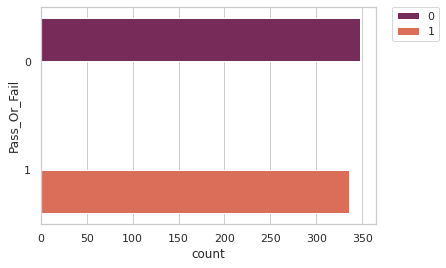

In [53]:
import matplotlib.pyplot as plt
sns.countplot(y= "Pass_Or_Fail",hue = "Pass_Or_Fail", data = data,palette= "rocket")
plt.legend(bbox_to_anchor=(1.05, 1),  loc=2, borderaxespad=0.)

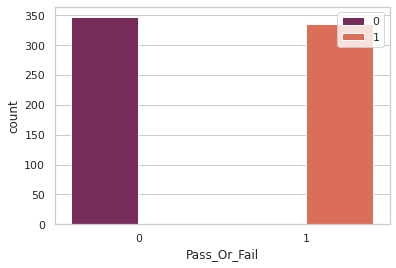

In [57]:
#adjusting the legend
import matplotlib.pyplot as plt
sns.countplot(x= "Pass_Or_Fail",hue = "Pass_Or_Fail", data = data,palette= "rocket")
plt.legend(loc="upper right")

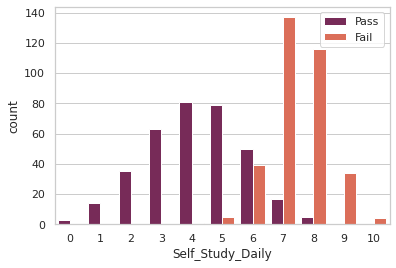

In [59]:
import matplotlib.pyplot as plt
sns.countplot(x= "Self_Study_Daily",hue = "Pass_Or_Fail", data = data,palette= "rocket")
plt.legend(['Pass','Fail'], loc="upper right" )

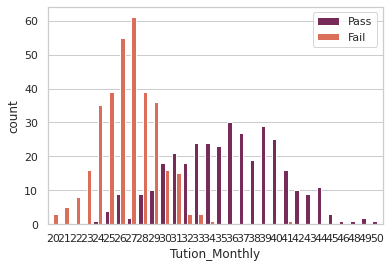

In [60]:
import matplotlib.pyplot as plt
sns.countplot(x= "Tution_Monthly",hue = "Pass_Or_Fail", data = data,palette= "rocket")
plt.legend(['Pass','Fail'], loc="upper right" )

**This Lab is done by Mary Adewunmi.**